# Getting started with Facebook Messenger Data
(updated Jan 2018)


## Downloading data 
Facebook makes messenger data freely available for download from your facebook profile. 
Go to 
-> Settings 
-> Your Facebook Information
-> Download Your Information 

Deselect all and select Messages. [select_data.jpg]

Date Range: All of my data Format: JSON, Media Quality: Low

Click create file. [create_file.jpg] 

The file will be available to download in 10-15 minutes.

## Reading message history from JSON File

In the inbox folder, your conversations with all friends will be in the form of in subfolders JSON files. There is a folder for each contact (or group) which contains gifs, photos, and videos shared in addition to a "messages.json" file. 

In [1]:
import os 
import nltk 
import json
import time
import pandas as pd 
import numpy as np
import datetime as dt 
from collections import Counter
import src.data_utils as du
import matplotlib.pyplot as plt 

In [39]:
root_dir = 'data/inbox/' # change this path to where your data is located
my_name = 'Judyy Shen' # your facebook name'
foldername = "friend1"

In [40]:
with open(root_dir + foldername + '/message.json') as f:
            data = json.load(f)

This json object will contain: participants, messages, title, is_still_participant, thread_type, and thread_path. 

Using participants, we can check how many people are in the conversation and who the conversation is with. Note that title can be changed in the a conversation and my not be the name of who you are conversing with. 

We are most interested in the messages in each file. 

In [41]:
# find participant
for p in data['participants']: 
    if p['name'] != my_name: 
        friend_name = p['name'] 

#count messages 
msg_count = len(data['messages'])
print("Your conversation with {} contains {} messages".format(friend_name, msg_count))

Your conversation with Lauren Fratamico contains 25 messages


## Messages

Each message contains the sender_name, timestamp_ms, content, and type. 
To convert time stamp, we can simply divide the ms time by 1000 and uses gmtime() from python time library. 

In [42]:
example_msg = data['messages'][0]
time_obj = time.gmtime(int(example_msg['timestamp_ms']/1000))
year, month, day = time_obj.tm_year, time_obj.tm_mon, time_obj.tm_mday
print("{} said:\n{} \nat {}-{}-{}".format(example_msg['sender_name'], example_msg['content'],  day, month, year))

Judyy Shen said:
Wait but look at this 
at 19-1-2019


In [43]:
sent_count = 0 
for msg in data['messages']: 
    if msg['sender_name'] == my_name: 
        sent_count += 1 
recieved_count = len(data['messages']) - sent_count

first_msg = data['messages'][-1]
time_obj = time.gmtime(int(first_msg['timestamp_ms']/1000))
f_year, f_month, f_day = time_obj.tm_year, time_obj.tm_mon, time_obj.tm_mday

recent_msg = data['messages'][0]
time_obj = time.gmtime(int(recent_msg['timestamp_ms']/1000))
r_year, r_month, r_day = time_obj.tm_year, time_obj.tm_mon, time_obj.tm_mday

print("Between {}-{}-{} and {}-{}-{}".format(f_month, f_day, f_year, r_month, r_day, r_year))
print("You sent {} messages to {}".format(sent_count, friend_name))
print("You recieved {} messages from {}".format(recieved_count, friend_name))

Between 1-10-2019 and 1-19-2019
You sent 17 messages to Lauren Fratamico
You recieved 8 messages from Lauren Fratamico


In [44]:
all_msg = {} 
for msg in data['messages']: 
    time_obj = time.gmtime(int(msg['timestamp_ms']/1000))
    year, month, day = time_obj.tm_year, time_obj.tm_mon, time_obj.tm_mday
    date = pd.Timestamp(year=int(year), month=int(month), day=int(day))
    if date in all_msg: 
        all_msg[date] += 1 
    else: 
        all_msg[date] = 1

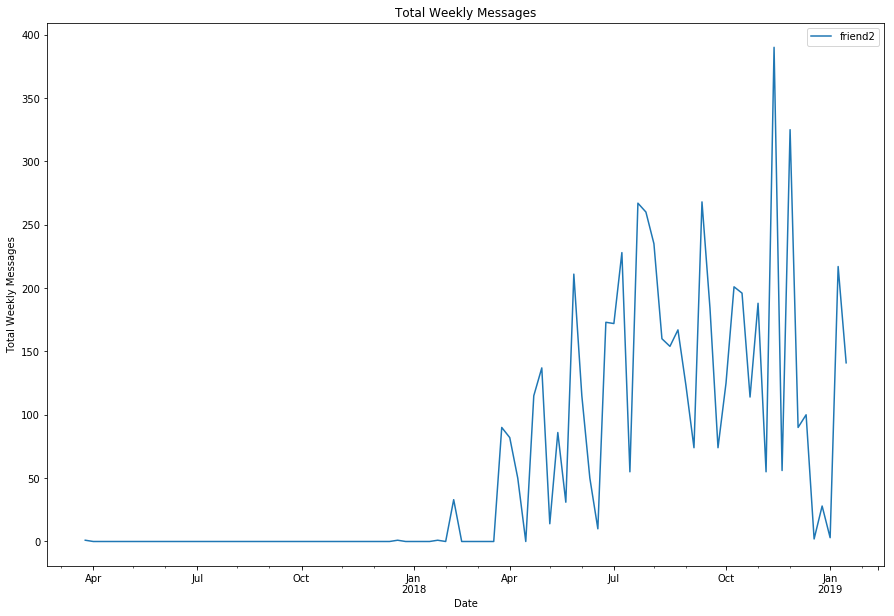

In [37]:
all_msg = pd.Series(all_msg, name="friend2")
all_msg.resample('W').sum().plot(figsize=(15,10))
plt.legend()
plt.title("Total Weekly Messages")
plt.xlabel("Date")
plt.ylabel("Total Weekly Messages")
plt.show()

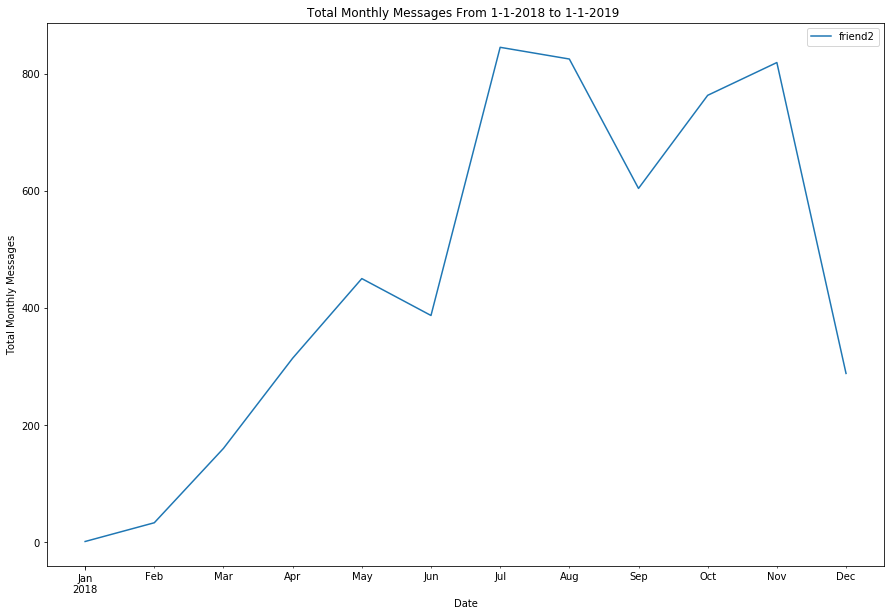

In [38]:
beg_date = '1-1-2018'
end_date = '1-1-2019'
all_msg[beg_date:end_date].resample('M').sum().plot(figsize=(15,10))
plt.title("Total Monthly Messages From {} to {} ".format(beg_date, end_date))
plt.xlabel("Date")
plt.ylabel("Total Monthly Messages")
plt.legend()
plt.show()

## Top friends over time

In [46]:
direct_conversations = []  
for filename in os.listdir(root_dir):
    if not filename.startswith('.'): 
        with open(root_dir + filename + '/message.json') as f:
            data = json.load(f)
            num_part = len(data['participants'])
            # filtering by direct conversations
            if num_part == 2: 
                direct_conversations.append(data)

In [ ]:
# Top friends over time
messages_cnt = Counter()
for data in direct_conversations: 
    people = data['participants']
    for p in people: 
        if p['name'] != my_name: 
            person = p['name']
    num_messages = len(data['messages'])
    messages_cnt[person] = num_messages
    
    #find earliest 
    timestamp = data['messages'][0]['timestamp_ms']
    year = time.gmtime(int(timestamp/1000)).tm_year

In [ ]:
messages_cnt.most_common(20)

In [ ]:
## Top friends over time